In [1]:
import numpy as np # подключим библиотеку для работы с массивами
np.random.seed(42) # начало генератора случайных чисел, чтобы после перезапуска были один
x = np.random.randn(1, 100) #(100, 1) # генерируем случайно несколько примеров входа, одн
a, b = 2, 1 # коэффициенты зависимости в данных
eps = .1 * np.random.randn(1, 100) # шум с нормальным распределением
y = b + a*x + eps # примеры выхода
x.shape, y.shape


((1, 100), (1, 100))

In [2]:
new_ind = np.arange(100) #сгенерируем массив последовательных чисел по количесвту данных
np.random.shuffle(new_ind)# случайно перемешаем их (переставим элементы массива)
new_ind

array([93, 28, 55, 30, 80, 17, 54, 76, 10,  9,  2, 87, 46, 98, 84, 82, 26,
       69, 85, 52, 40, 67, 99, 63, 83,  0, 45, 11, 95, 22, 66, 20, 33, 90,
       27, 37, 97, 18, 70, 86, 77, 39, 34, 29, 72, 81, 58,  3, 92,  4, 60,
       43, 78, 96, 36, 94, 53, 74,  5, 91, 51, 48, 73, 79, 68, 21, 61, 71,
       57, 88, 50, 62, 31, 65, 14, 75, 13, 15,  7, 64, 19, 44, 35, 56,  6,
       59, 12, 23, 24, 49, 25, 41, 38, 47, 42,  8, 32, 16, 89,  1])

In [3]:
train_idx = new_ind[:70]# первую часть индексов (с 0 до 69) определим как обучающие
test_idx = new_ind[70:]# вторую часть индексов (с 70 до конца=99) определим как тестовые
# используя эти индексы разделим массивы данных на обучающие и тестовые
x_train, y_train = x[0][train_idx], y[0][train_idx]# обучающие вход и желаемый выход
x_test, y_test = x[0][test_idx], y[0][test_idx]# тестовые вход и желаемый в

<Axes: >

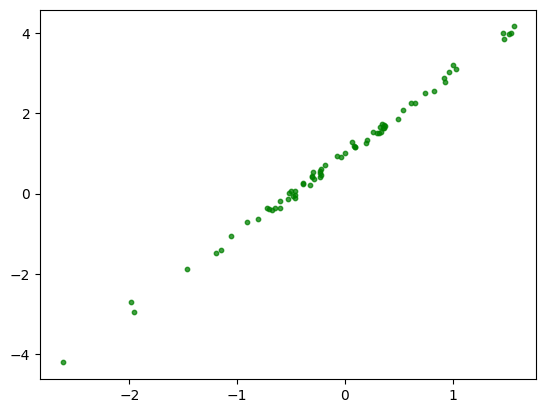

In [8]:
def plot_line_or_scatter(type_plot, x_data, y_data, x_label="", y_label="", title="", color="", alpha=""):

    _, ax = plt.subplots()

    if type_plot == 'scatter':
        ax.scatter(x_data, y_data, s=10, color=color, alpha=0.75)
    else:
        ax.plot(x_data, y_data, lw=2, color=color, alpha=1)


    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    return ax

plot_line_or_scatter('scatter', x_train, y_train, color='green')

In [9]:
a = np.random.randn(1)# случайное число для параметра a
a


array([-0.23739196])

In [10]:
b = np.random.rand(1)# случайное число для параметра b
b


array([0.09783416])

In [13]:
lr = 1e-3 # шаг обучения
epochs = 100 # количество эпох
# ЦИКЛ ОБУЧЕНИЯ
Loss=[]# массив для значений функции ошибки
for ep in range(epochs): # в цикле по количеству эпох
  y_pred = b + a*x_train # считаем выход модели для всех примеров входов с текущими зн
  error = (y_pred - y_train) # считаем разницу между полученным выходом и тем, который
  loss = (error**2).mean() # считаем суммарную ошибку. Функция среднего mean() как зам
  Loss.append(loss) # добавлем текущее значение в массив
  b_grad = 2 * error.mean() # считаем производную по параметру, смещению b (на 2 можно
  a_grad = 2 * (x_train * error).mean() # считаем производную по параметру, множителю
# обучение = изменение параметров
  a = a - lr*a_grad # изменяем параметр a
  b = b - lr*b_grad # изменяем параметр b
  if ep % 20 == 0 or ep==epochs-1: # каждые 20 эпох будем
    print('ep: %3d loss: %8.6f a=%4.3f b=%4.3f'%(ep,loss,a,b))

ep:   0 loss: 2.267969 a=0.279 b=0.356
ep:  20 loss: 2.147159 a=0.323 b=0.377
ep:  40 loss: 2.032876 a=0.367 b=0.398
ep:  60 loss: 1.924763 a=0.409 b=0.417
ep:  80 loss: 1.822480 a=0.450 b=0.436
ep:  99 loss: 1.730422 a=0.488 b=0.453


/tmp/ipython-input-557685611.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('ep: %3d loss: %8.6f a=%4.3f b=%4.3f'%(ep,loss,a,b))


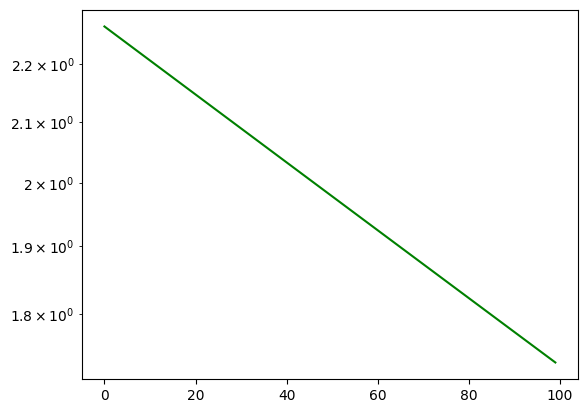

In [14]:
from matplotlib import pyplot as plt #
plt.plot(np.arange(epochs), Loss, color='green') # рисуем
plt.yscale('log')

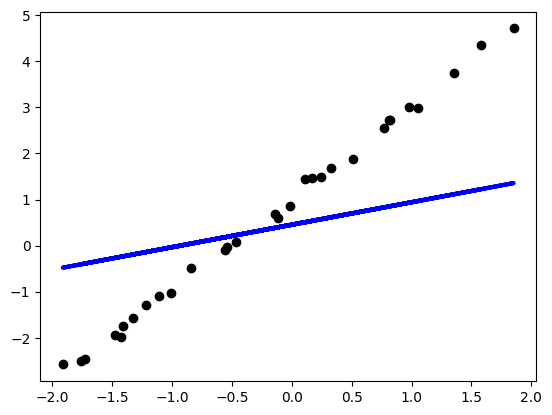

In [15]:
import matplotlib.pyplot as plt
y_test_pred = b + a*x_test
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)
plt.show()


/tmp/ipython-input-3294884770.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Обученные параметры: b=%6.4f a=%6.4f'%(linr.intercept_, linr.coef_)) #


Обученные параметры: b=0.9860 a=1.9868


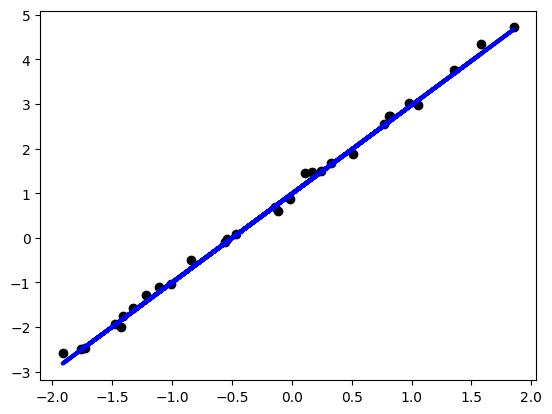

In [16]:
from sklearn.linear_model import LinearRegression # подключим модель линейной регрессии
linr = LinearRegression() # создадим ее
linr.fit(x_train.reshape(70, 1), y_train.reshape(70, 1)) # обучим модель, принудительно п
#linr.fit(x_train, y_train) # обучим модель, принудительно переформатировав размеры масси
print('Обученные параметры: b=%6.4f a=%6.4f'%(linr.intercept_, linr.coef_)) #
y_test_pred=linr.predict(x_test.reshape(30,1))# посчитаем выход модели на тестовых пример
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)# нарисуем его
plt.scatter(x_test, y_test, color='black') # и желаемый
plt.show()

In [18]:
from sklearn.datasets import load_wine # функция которая загружает набор данных
data_wine = load_wine() # загружаем набор данных
data_wine.target[[10, 80, 140]] # в поле target хранятся номера классов примеров, некотор



array([0, 1, 2])

In [19]:
list(data_wine.target_names)

[np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]

In [20]:
X = data_wine.data # в поле data - примеры входов, вектора
y = data_wine.target # Указания учителя = номера классов
from sklearn.model_selection import train_test_split # подключаем функцию для разделения
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # и отдаем 30% н
#y_train # убедитесь что и в обучении и в тесте есть данные разных классов
y_test

array([0, 0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 2,
       1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0,
       1, 2, 0, 0, 1, 2, 1, 1, 1, 0])

In [21]:
X_train[:3]

array([[1.383e+01, 1.570e+00, 2.620e+00, 2.000e+01, 1.150e+02, 2.950e+00,
        3.400e+00, 4.000e-01, 1.720e+00, 6.600e+00, 1.130e+00, 2.570e+00,
        1.130e+03],
       [1.410e+01, 2.160e+00, 2.300e+00, 1.800e+01, 1.050e+02, 2.950e+00,
        3.320e+00, 2.200e-01, 2.380e+00, 5.750e+00, 1.250e+00, 3.170e+00,
        1.510e+03],
       [1.316e+01, 3.570e+00, 2.150e+00, 2.100e+01, 1.020e+02, 1.500e+00,
        5.500e-01, 4.300e-01, 1.300e+00, 4.000e+00, 6.000e-01, 1.680e+00,
        8.300e+02]])

In [22]:
lin_clf = LinearRegression() # создаем модель линейной регресии
lin_clf.fit(X_train, y_train) # обучаем ее
print(f'Обученные параметры: \nСмещение b={lin_clf.intercept_:6.4f} ')
print('Множители a= ',lin_clf.coef_)

Обученные параметры: 
Смещение b=3.5602 
Множители a=  [-1.08457208e-01  3.89996076e-02 -1.67175869e-01  3.13347273e-02
 -4.41904488e-04  2.50423591e-01 -5.36233022e-01 -6.79235939e-01
  1.33499975e-01  6.18988521e-02 -4.70302753e-02 -2.60791691e-01
 -6.76736578e-04]


0.8410802302070729


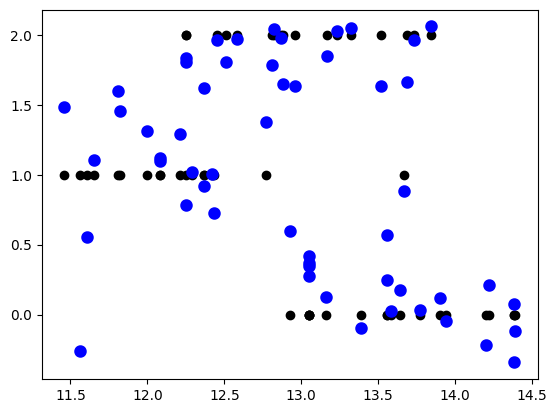

In [23]:
y_predicted = lin_clf.predict(X_test) # рассчитываем выходы модели на тестовых данных
score=lin_clf.score(X_test,y_test)# считаем ошибку
print(score)#
i=0 # номер измерения для построения
plt.scatter(X_test[:,i], y_test, color='black')# строим желаемые выходы
plt.scatter(X_test[:,i], y_predicted, color='blue', linewidth=3)# и рассчит

In [24]:
y_pred_class=np.rint(y_predicted)
y_pred_class[y_pred_class>2]=2
y_pred_class[y_pred_class<0]=0
y_pred_class=y_pred_class.astype('int')
score=np.sum(y_pred_class==y_test)/len(y_test)
score


np.float64(0.9074074074074074)